import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('stroke_data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5110, 12)

In [5]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data['bmi'].fillna(value = data.bmi.mean(), inplace = True)

In [8]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.shape

(5110, 12)

In [10]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
data.hypertension.unique()

array([0, 1], dtype=int64)

In [12]:
data.heart_disease.unique()

array([1, 0], dtype=int64)

In [13]:
data.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [15]:
data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [16]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [17]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

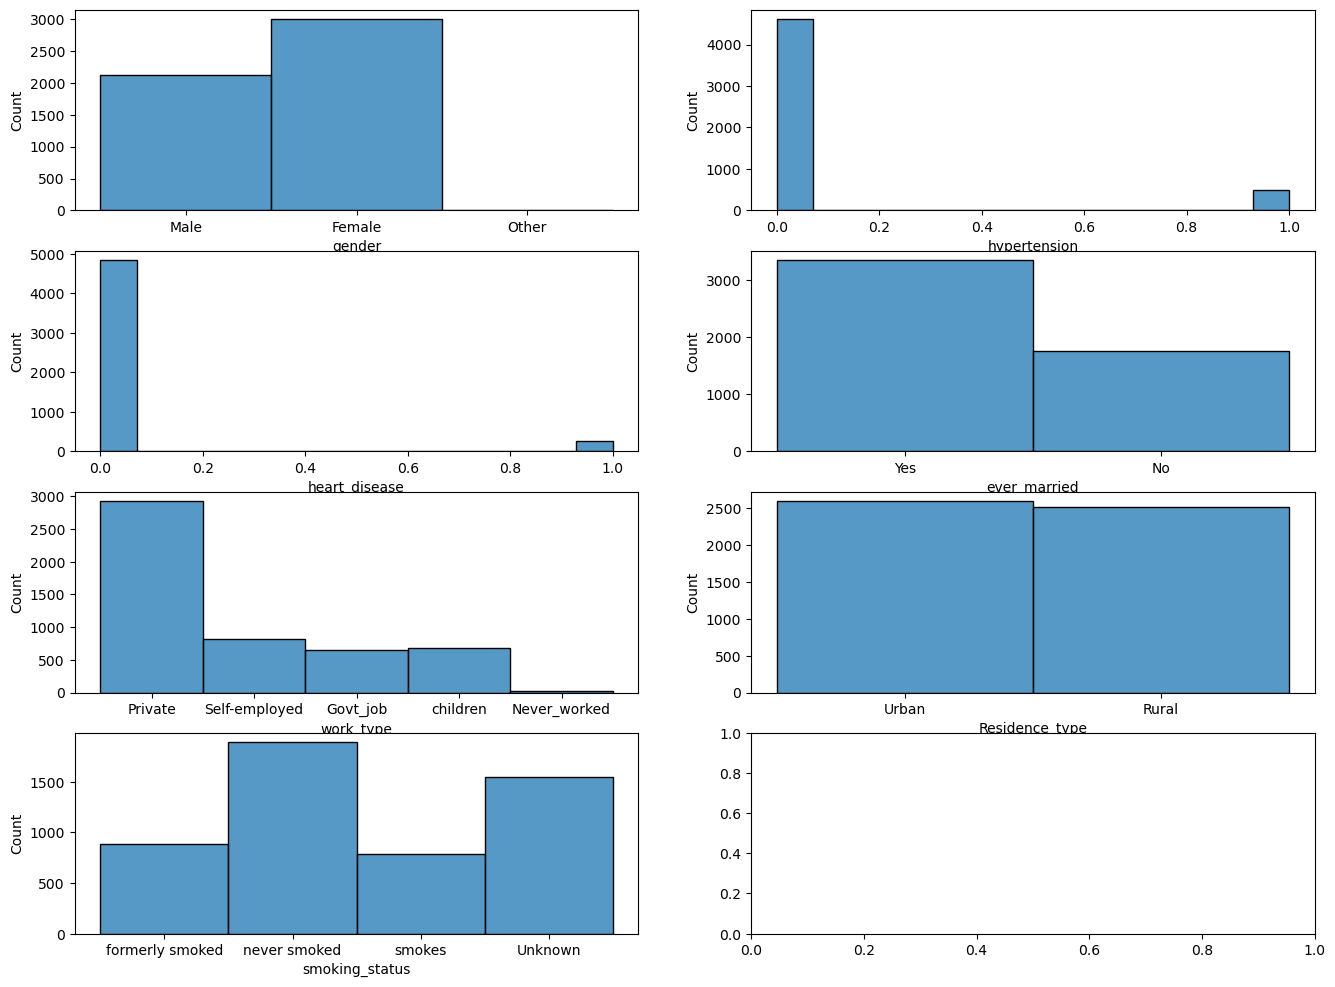

In [18]:
fig, axes = plt.subplots(4,2, figsize = (16,12))
sns.histplot(data['gender'], ax = axes[0,0])
sns.histplot(data['hypertension'], ax = axes[0,1])
sns.histplot(data['heart_disease'], ax = axes[1,0])
sns.histplot(data['ever_married'], ax = axes[1,1])
sns.histplot(data['work_type'], ax = axes[2,0])
sns.histplot(data['Residence_type'], ax = axes[2,1])
sns.histplot(data['smoking_status'], ax = axes[3,0])
plt.show()

In [ ]:
fig, axes = plt.subplots(4,2, figsize = (16,12))
sns.distplot(data['gender'], ax = axes[0,0])
sns.distplot(data['hypertension'], ax = axes[0,1])
sns.distplot(data['heart_disease'], ax = axes[1,0])
sns.distplot(data['ever_married'], ax = axes[1,1])
sns.distplot(data['work_type'], ax = axes[2,0])
sns.distplot(data['Residence_type'], ax = axes[2,1])
sns.distplot(data['smoking_status'], ax = axes[3,0])
plt.show()

C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aswin Raj\

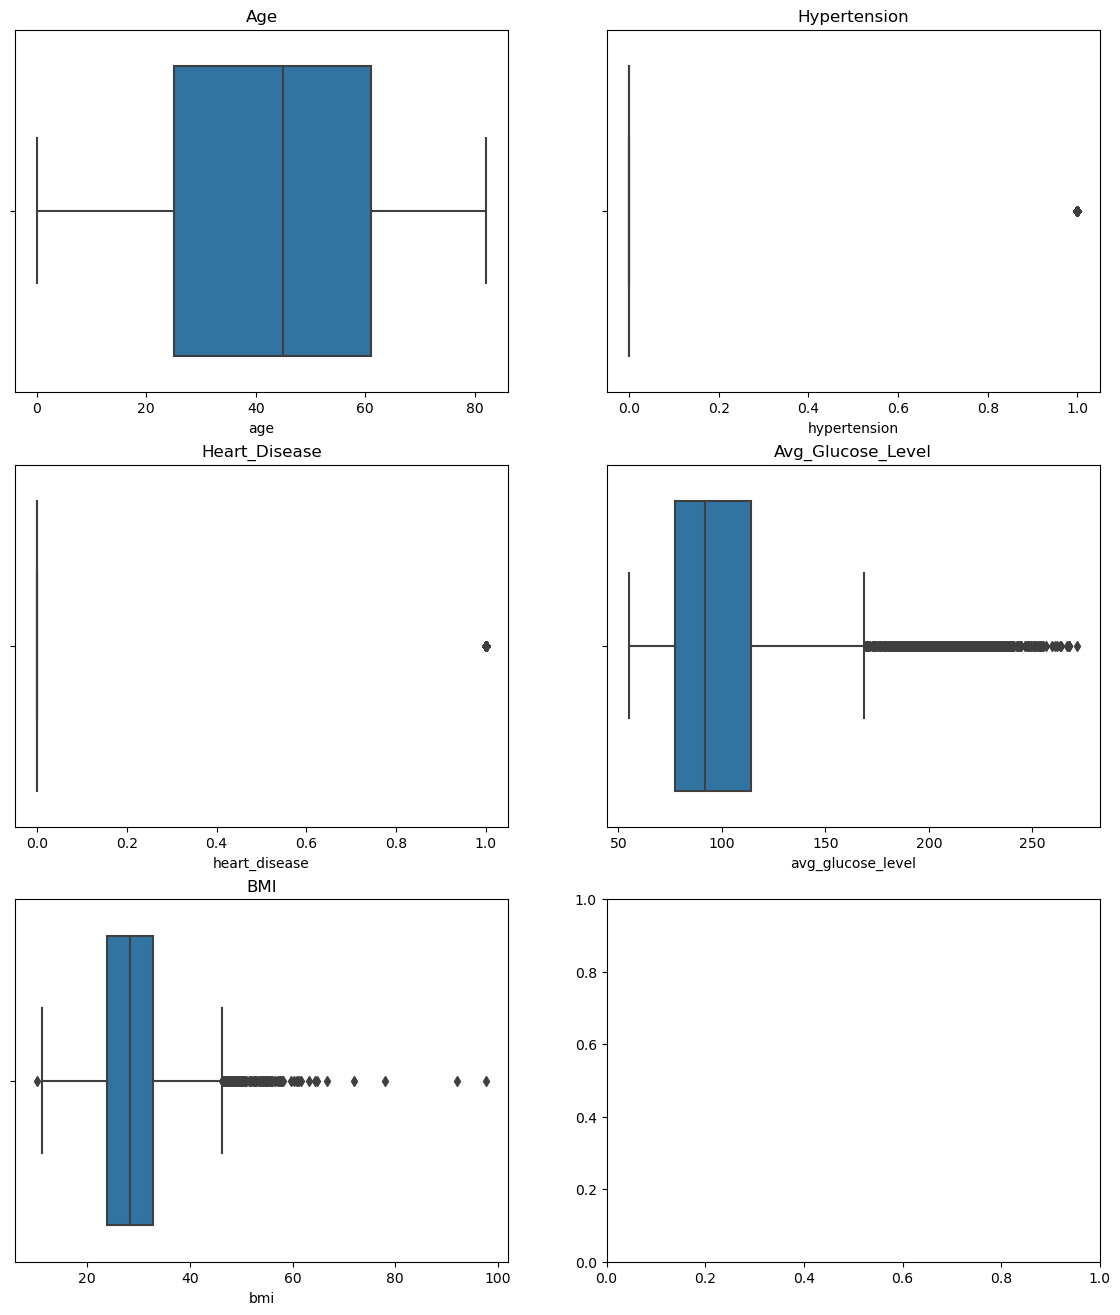

In [19]:
fig, axes = plt.subplots(3,2, figsize = (14,16))
sns.boxplot(data['age'], ax = axes[0,0]).set_title('Age')
sns.boxplot(data['hypertension'], ax = axes[0,1]).set_title('Hypertension')
sns.boxplot(data['heart_disease'], ax = axes[1,0]).set_title('Heart_Disease')
sns.boxplot(data['avg_glucose_level'], ax = axes[1,1]).set_title('Avg_Glucose_Level')
sns.boxplot(data['bmi'], ax = axes[2,0]).set_title('BMI')
plt.show()

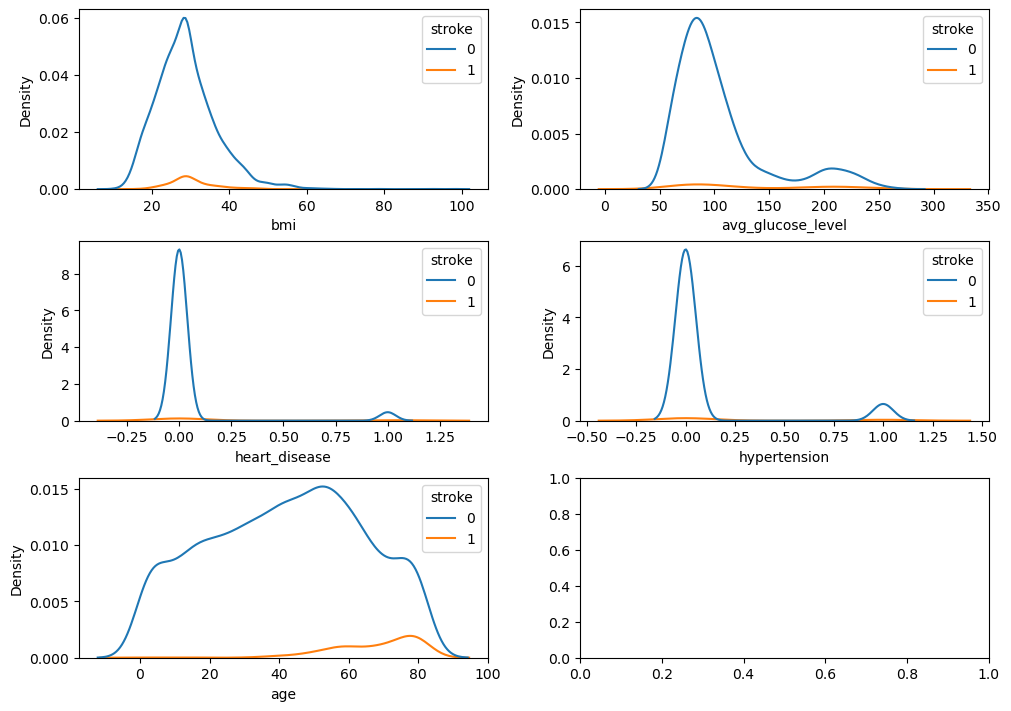

In [20]:
fig, axes = plt.subplots(3,2, constrained_layout = True, figsize = (10,7))

sns.kdeplot(data = data, x = data['bmi'], hue = 'stroke', ax = axes[0,0])
sns.kdeplot(data = data, x = data['avg_glucose_level'], hue = 'stroke', ax = axes[0,1])
sns.kdeplot(data = data, x = data['heart_disease'], hue = 'stroke', ax = axes[1,0])
sns.kdeplot(data = data, x = data['hypertension'], hue = 'stroke', ax = axes[1,1])
sns.kdeplot(data = data, x = data['age'], hue = 'stroke', ax = axes[2,0])

plt.show()

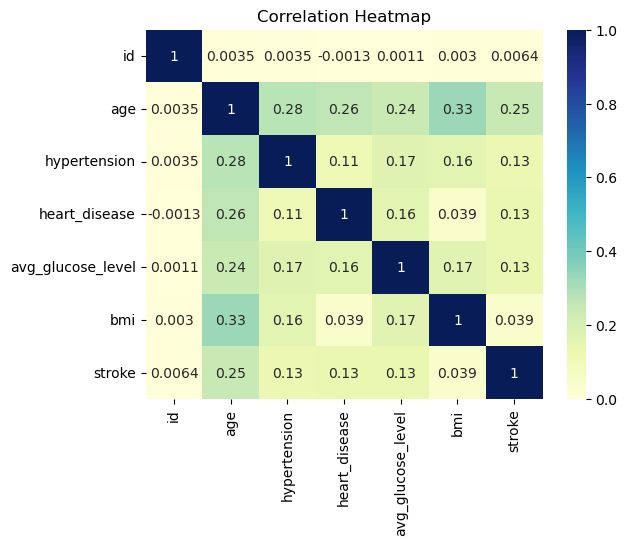

In [21]:
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

# Label Encoder

In [22]:
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['ever_married']=le.fit_transform(data['ever_married'])
data['work_type']=le.fit_transform(data['work_type'])
data['Residence_type']=le.fit_transform(data['Residence_type'])
data['smoking_status']=le.fit_transform(data['smoking_status'])
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [23]:
x = data[['gender', 'age', 'hypertension','heart_disease','ever_married', 'work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y = data['stroke']

# Scale

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
df= pd.DataFrame(x)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [26]:
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.666667
2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667
...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.975586,1.0,0.0,1.0,0.50,1.0,0.132167,0.212981,0.666667
5106,0.0,0.987793,0.0,0.0,1.0,0.75,1.0,0.323516,0.340206,0.666667
5107,0.0,0.426270,0.0,0.0,1.0,0.75,0.0,0.128658,0.232532,0.666667
5108,0.5,0.621582,0.0,0.0,1.0,0.50,0.0,0.513203,0.175258,0.333333


C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

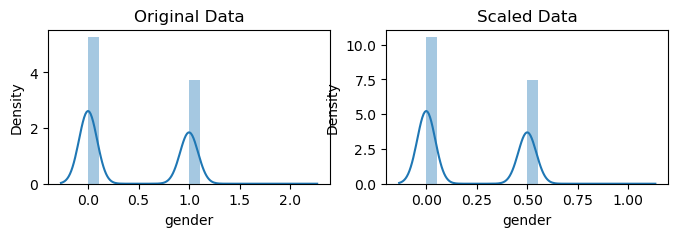

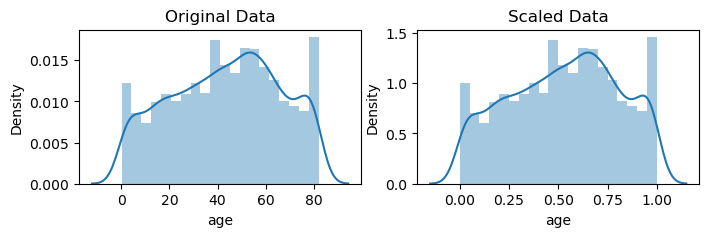

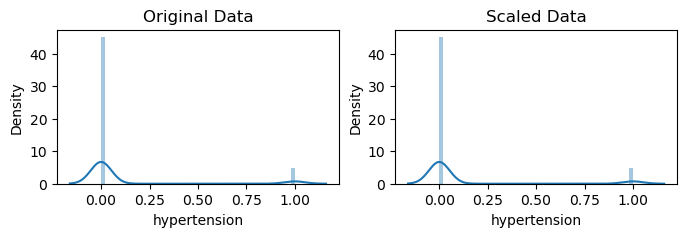

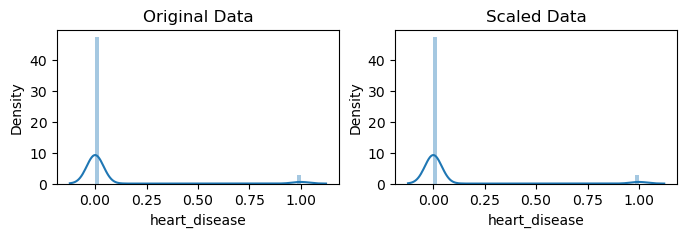

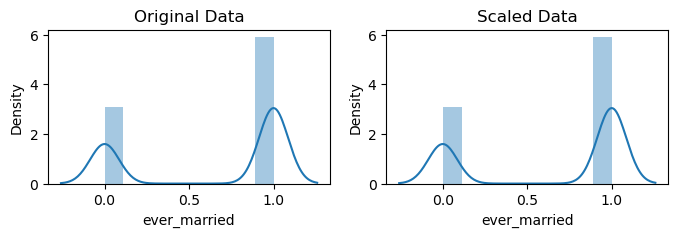

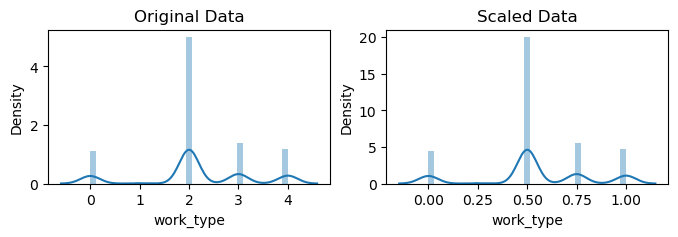

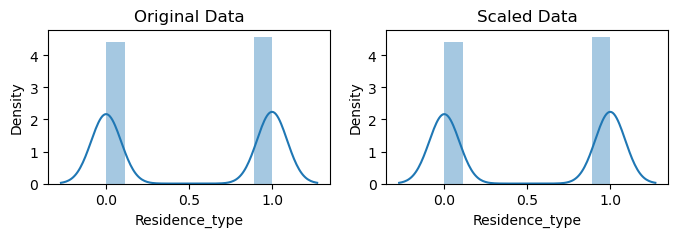

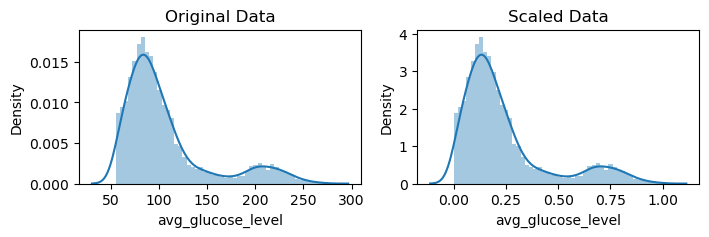

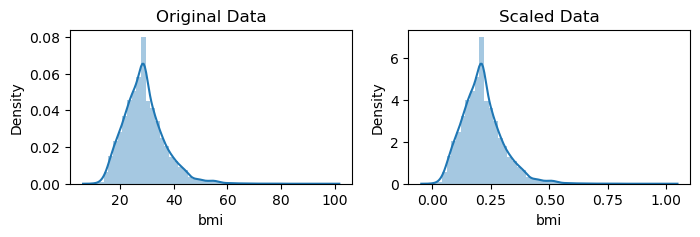

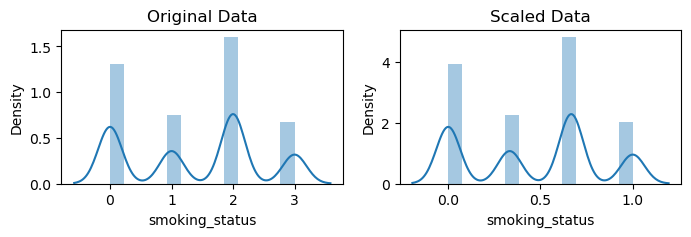

In [27]:
for i in df:
    fig, ax=plt.subplots(1,2, figsize = (8,2))
    sns.distplot(df[i],ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(df_scaled[i],ax=ax[1])
    ax[1].set_title("Scaled Data")

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# SVM

In [29]:
from sklearn.svm import SVC
svmclf= SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [30]:
y_pred_svm=svmclf.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
print('accuracy=',accuracy_score(y_test,y_pred_svm))

accuracy= 0.9393346379647749


In [33]:
print(confusion_matrix(y_test,y_pred_svm))

[[960   0]
 [ 62   0]]


In [34]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\Aswin Raj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aswin Raj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aswin Raj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decison Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred_dt=dt_clf.predict(x_test)

In [37]:
print('accuracy=',accuracy_score(y_test,y_pred_dt))

accuracy= 0.9148727984344422


In [38]:
print(confusion_matrix(y_test,y_pred_dt))

[[925  35]
 [ 52  10]]


In [77]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       960
           1       0.22      0.16      0.19        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022



# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_pred_rf=rf_clf.predict(x_test)

In [42]:
print('accuracy=',accuracy_score(y_test,y_pred_rf))

accuracy= 0.9393346379647749


In [43]:
print(confusion_matrix(y_test,y_pred_rf))

[[960   0]
 [ 62   0]]


In [44]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\Aswin Raj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aswin Raj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aswin Raj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparamter Tuning

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [46]:
n_estimators =[int(x) for x in np.linspace(start =10,stop=80,num=10)]
max_features=['auto','sqrt']
max_depth = [2,4]
min_samples_split=[2,5]
min_samples_leaf = [1,2]
bootstrap = [True,False]

In [47]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap': bootstrap
}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [48]:
rf_classifier = RandomForestClassifier()

In [49]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_classifier,param_distributions=param_grid, cv=10 ,verbose=2, n_jobs = 4)
rf_RandomGrid.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [50]:
best_model  = rf_RandomGrid.best_estimator_

In [51]:
y_pred = best_model.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred) 

0.9393346379647749

In [53]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\Aswin Raj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aswin Raj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aswin Raj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SMOTE

In [54]:
print("Before Over Sampling, count of the label '1': {}".format(sum(y_train == 1)))  
print("Before Over Sampling, count of the label '0': {} \n".format(sum(y_train == 0)))  
from imblearn.over_sampling import SMOTE  
sm1 = SMOTE(random_state = 2)  
x_train_res, y_train_res = sm1.fit_resample(x_train, y_train.ravel())  
print('After Over Sampling, the shape of the train_X: {}'.format(x_train_res.shape))  
print('After Over Sampling, the shape of the train_y: {} \n'.format(y_train_res.shape))  
print("After Over Sampling, count of the label '1': {}".format(sum(y_train_res == 1)))  
print("After Over Sampling, count of the label '0': {}".format(sum(y_train_res == 0)))

Before Over Sampling, count of the label '1': 187
Before Over Sampling, count of the label '0': 3901 

After Over Sampling, the shape of the train_X: (7802, 10)
After Over Sampling, the shape of the train_y: (7802,) 

After Over Sampling, count of the label '1': 3901
After Over Sampling, count of the label '0': 3901


# SVM Smote

In [55]:
from sklearn.svm import SVC
svmclf= SVC(kernel='linear')
svmclf.fit(x_train_res,y_train_res)

SVC(kernel='linear')

In [56]:
y_pred_svm=svmclf.predict(x_test)

In [57]:
print('accuracy=',accuracy_score(y_test,y_pred_svm))

accuracy= 0.7778864970645792


In [58]:
print(confusion_matrix(y_test,y_pred_svm))

[[755 205]
 [ 22  40]]


In [59]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       960
           1       0.16      0.65      0.26        62

    accuracy                           0.78      1022
   macro avg       0.57      0.72      0.56      1022
weighted avg       0.92      0.78      0.83      1022



# Decison Tree

In [60]:
dts_clf=DecisionTreeClassifier()
dts_clf.fit(x_train_res,y_train_res)

DecisionTreeClassifier()

In [61]:
y_pred_dts=dts_clf.predict(x_test)

In [62]:
print('accuracy=',accuracy_score(y_test,y_pred_dts))

accuracy= 0.8610567514677103


In [63]:
print(confusion_matrix(y_test,y_pred_dts))

[[864  96]
 [ 46  16]]


In [64]:
print(metrics.classification_report(y_test, y_pred_dts))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       960
           1       0.14      0.26      0.18        62

    accuracy                           0.86      1022
   macro avg       0.55      0.58      0.55      1022
weighted avg       0.90      0.86      0.88      1022



# Random Forest Smote

In [65]:
rfs_clf=RandomForestClassifier()
rfs_clf.fit(x_train_res,y_train_res)

RandomForestClassifier()

In [66]:
y_pred_rfs=rfs_clf.predict(x_test)

In [67]:
print('accuracy=',accuracy_score(y_test,y_pred_rfs))

accuracy= 0.9001956947162426


In [68]:
print(confusion_matrix(y_test,y_pred_rfs))

[[907  53]
 [ 49  13]]


In [69]:
print(metrics.classification_report(y_test, y_pred_rfs))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       960
           1       0.20      0.21      0.20        62

    accuracy                           0.90      1022
   macro avg       0.57      0.58      0.57      1022
weighted avg       0.90      0.90      0.90      1022



# Randomized Search Smote

In [70]:
n_estimators =[int(x) for x in np.linspace(start =10,stop=80,num=10)]
max_features=['auto','sqrt']
max_depth = [2,4]
min_samples_split=[2,5]
min_samples_leaf = [1,2]
bootstrap = [True,False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap': bootstrap
}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [71]:
rfs_classifier = RandomForestClassifier()

In [72]:
rf_RandomGrid = RandomizedSearchCV(estimator = rfs_classifier,param_distributions=param_grid, cv=10 ,verbose=2, n_jobs = 4)
rf_RandomGrid.fit(x_train_res,y_train_res)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [73]:
best_model  = rf_RandomGrid.best_estimator_

In [74]:
y_pred_rss = best_model.predict(x_test)

In [75]:
accuracy_score(y_test,y_pred_rss) 

0.7240704500978473

In [76]:
print(metrics.classification_report(y_test, y_pred_rss))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.15      0.73      0.24        62

    accuracy                           0.72      1022
   macro avg       0.56      0.72      0.54      1022
weighted avg       0.93      0.72      0.80      1022

